In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
yellow19_09 = pd.read_csv("C:/Users/ellicng/Desktop/Kexin_Taxi/yellow_tripdata_2019-09.csv")
print(yellow19_09.head())
yellow19_09 = yellow19_09.dropna(axis = 0)
yellow19_09.isnull().sum()

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       1.0  2019-09-01 00:06:48   2019-09-01 00:25:46              1.0   
1       1.0  2019-09-01 00:29:17   2019-09-01 00:57:54              1.0   
2       1.0  2019-09-01 00:41:32   2019-09-01 00:41:36              1.0   
3       1.0  2019-09-01 00:59:11   2019-09-01 00:59:15              1.0   
4       1.0  2019-09-01 00:39:41   2019-09-01 00:45:06              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            2.0         1.0                  N           186           161   
1            5.5         1.0                  N           161           256   
2            2.9         1.0                  N           145           145   
3            0.0         1.0                  N           145           145   
4            1.5         1.0                  N            95            93   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

In [3]:
cleaned_yellow19_09 = yellow19_09.loc[(yellow19_09["passenger_count"] >= 0) & 
                                      (yellow19_09["trip_distance"]!= 0) & (yellow19_09['fare_amount'] >= 2.5) & 
                                      (yellow19_09['total_amount'] >= 2.5) & (yellow19_09['payment_type']==1) &
                                      (yellow19_09["tpep_dropoff_datetime"] >"2019-09-01 00:00:00") & 
                                      (yellow19_09["tpep_dropoff_datetime"] < "2019-09-30 23:59:59")
                                     ]

In [4]:
choose = ["passenger_count", "trip_distance", "payment_type", "fare_amount", "tip_amount", "total_amount"]
cleaned_df = cleaned_yellow19_09
print(cleaned_df.head())

    VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
5        1.0  2019-09-01 00:00:08   2019-09-01 00:36:43              2.0   
7        2.0  2019-09-01 00:17:23   2019-09-01 00:27:45              1.0   
8        2.0  2019-09-01 00:36:12   2019-09-01 01:14:56              1.0   
9        2.0  2019-09-01 00:10:45   2019-09-01 00:30:52              1.0   
10       2.0  2019-09-01 00:16:23   2019-09-01 00:32:31              1.0   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
5            8.30         1.0                  N           161           232   
7            1.20         1.0                  N           137           186   
8           11.17         1.0                  N            48            89   
9            5.81         1.0                  N            24           107   
10           4.71         1.0                  N           249           263   

    payment_type  fare_amount  extra  mta_tax  tip_amount  tol

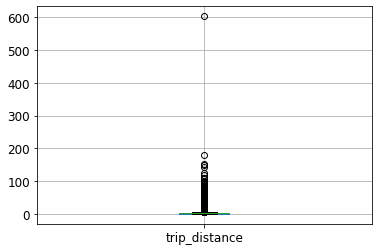

In [5]:
dis_boxplot = cleaned_df.boxplot(column = "trip_distance", fontsize = 12)

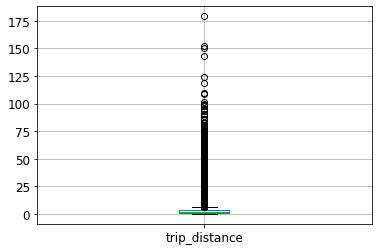

In [6]:
cleaned_df = cleaned_df.loc[cleaned_df["trip_distance"] <= 200]
dis_boxplot = cleaned_df.boxplot(column = "trip_distance", fontsize = 12)

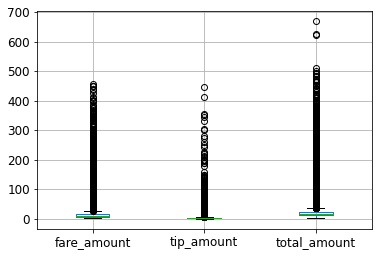

In [7]:
amount = ["fare_amount", "tip_amount", "total_amount"]
amount_total_boxplot = cleaned_df.boxplot(column = amount, fontsize = 12)

In [8]:
choose = ["passenger_count", "trip_distance", "payment_type", "fare_amount", "tip_amount", "total_amount"]
cleaned_IQR = cleaned_df[choose]

Q1 = np.quantile(cleaned_IQR, 0.25, interpolation = 'lower')
Q3 = np.quantile(cleaned_IQR, 0.75, interpolation = 'higher')
IQR = Q3 - Q1

cleaned19 = cleaned_df[~(((Q1 - 6*IQR) > cleaned_IQR) | (cleaned_IQR > (Q3 + 5*IQR))).any(axis=1)]

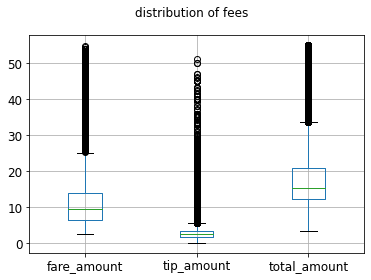

In [9]:
amount_boxplot = amount_total_boxplot = cleaned19.boxplot(column = amount, fontsize = 12)
afig = amount_boxplot.get_figure()
afig.suptitle("distribution of fees")
afig.show()
afig.savefig("distribution of fees")

In [10]:
# feature engineering

In [11]:
cleaned19["pickup_date"] = cleaned19["tpep_pickup_datetime"].str[5:10]
cleaned19["pickup_time"] = cleaned19["tpep_pickup_datetime"].str[11:18]
print(cleaned19.head())

    VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
5        1.0  2019-09-01 00:00:08   2019-09-01 00:36:43              2.0   
7        2.0  2019-09-01 00:17:23   2019-09-01 00:27:45              1.0   
8        2.0  2019-09-01 00:36:12   2019-09-01 01:14:56              1.0   
9        2.0  2019-09-01 00:10:45   2019-09-01 00:30:52              1.0   
10       2.0  2019-09-01 00:16:23   2019-09-01 00:32:31              1.0   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
5            8.30         1.0                  N           161           232   
7            1.20         1.0                  N           137           186   
8           11.17         1.0                  N            48            89   
9            5.81         1.0                  N            24           107   
10           4.71         1.0                  N           249           263   

    payment_type  fare_amount  extra  mta_tax  tip_amount  tol

In [14]:
cleaned19.reset_index().to_pickle('C:/Users/ellicng/Desktop/Kexin_Taxi/yellow_cleaned19.pkl')